<a href="https://colab.research.google.com/github/Siddhantg2002/Projects/blob/main/Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.× 
import tensorflow as tf 
from  __future__ import absolute_import, division, print_function, unicode_literals
from tensorflow import keras
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from six.moves import urllib
import warnings
warnings.filterwarnings("ignore")

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist # load dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() # split into tetsing and training

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images [0,23,23]

194

In [ ]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

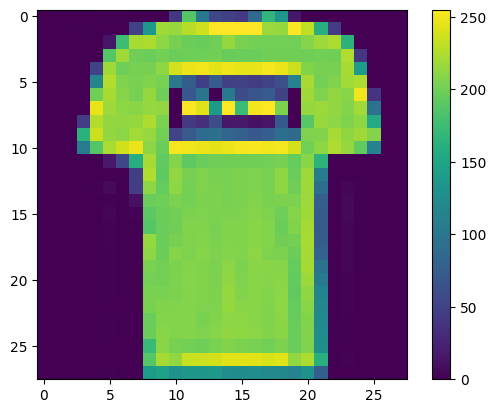

In [ ]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
model = keras.Sequential([
      keras.layers.Flatten(input_shape= (28, 28)), # input layer (1)
      keras.layers.Dense(128, activation='relu'), # hidden layer (2)
      keras.layers.Dense(10, activation='softmax') # output layer (3)
  ])

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit (train_images, train_labels, epochs=20) 

Epoch 1/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4945 - accuracy: 0.8264
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3703 - accuracy: 0.8673
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3324 - accuracy: 0.8803
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3091 - accuracy: 0.8850
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2928 - accuracy: 0.8924
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2790 - accuracy: 0.8968
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2666 - accuracy: 0.9008
Epoch 8/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2553 - accuracy: 0.9050
Epoch 9/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2447 - accuracy: 0.9087
Epoch 10/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)                                                                            
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3558 - accuracy: 0.8891
Test accuracy: 0.8891000151634216


In [ ]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
print(predictions[0])

[3.1407899e-10 4.7010901e-14 4.3406593e-12 1.4678833e-18 1.7155726e-11
 1.0952988e-05 1.4880304e-14 3.1366563e-04 1.8393264e-11 9.9967539e-01]


In [ ]:
print(np.argmax(predictions[0]))

9


In [ ]:
print(class_names[np.argmax(predictions[0])])

Ankle boot


313/313 [==============================] - 1s 2ms/step
Ankle boot


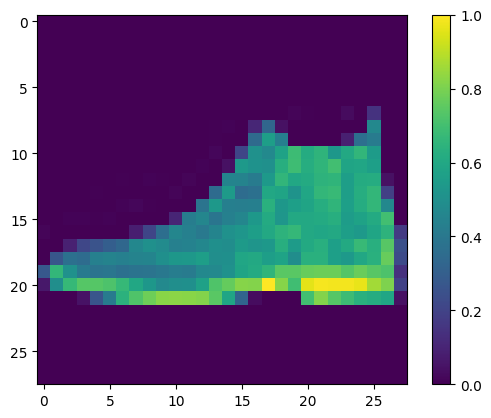

In [ ]:
predictions = model.predict(test_images)
print(class_names[np.argmax(predictions[0])])
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
test_labels[0]

9

Pick a number: 9
1/1 [==============================] - 0s 23ms/step


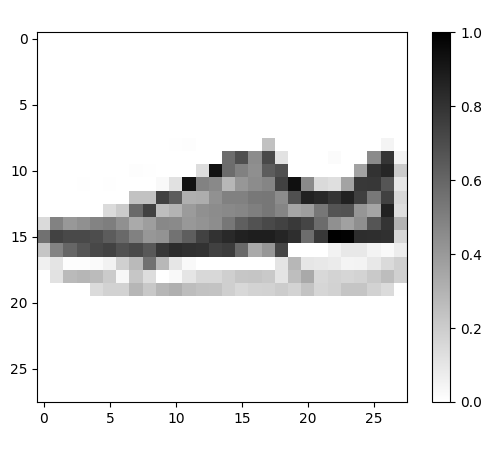

In [ ]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
              
def predict(model, image, correct_label):
  class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]
  show_image(image, class_names[correct_label], predicted_class)

def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary) 
  plt.title("Excpected: " + label) 
  plt.xlabel("Guess: " + guess)
  plt.colorbar() 
  plt.grid(False) 
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int (num)
      if 0 <= num <= 1000:
        return int (num)
      else:
        print("Try again...")


num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)